# Pré-processamento e KNN com **Stroke Prediction Dataset**

> **Objetivo**: praticar o pré-processamento no Python: seleção, padronização (`StandardScaler` ou `MinMaxScaler`), discretização (One-Hot), binarização, tratamento de faltantes e **outliers**; e ao final, aplicar um KNN com `k=5` usando **distância euclidiana**.

**Dataset**: [healthcare-dataset-stroke-data.csv](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**Dataset: Stroke Prediction**

**Colunas:**
1. `gender` → Gênero da pessoa (ex.: *Male*, *Female*, *Other*).
2. `age` → Idade em anos.
3. `hypertension` → Indicador de hipertensão arterial (0 = não tem, 1 = tem diagnóstico).
4. `heart_disease` → Indicador de doença cardíaca (0 = não tem, 1 = tem diagnóstico).
5. `ever_married` → Já foi casado(a) alguma vez? (valores típicos: *Yes* / *No*).
6. `work_type` → Tipo de ocupação (ex.: *Private*, *Self-employed*, *Govt_job*, *Never_worked*, *children*).
7. `Residence_type` → Tipo de residência (ex.: *Urban* / *Rural*).
8. `avg_glucose_level` → Nível médio de glicose no sangue (mg/dL).
9. `bmi` → Índice de Massa Corporal (*Body Mass Index*), em kg/m².
10. `smoking_status` → Status de tabagismo (ex.: *never smoked*, *formerly smoked*, *smokes*, *Unknown*).
11. `stroke` → **Alvo**: ocorrência de **AVC (stroke)** (0 = não teve, 1 = teve).

> **Importante**: a coluna alvo (variável $y$) chama-se `stroke`, onde **1** significa que **teve AVC** e **0** caso contrário.

> Usaremos apenas bibliotecas padrão do ecossistema Python científico.

> Visualizações básicas com as bibliotecas matplotlib e seaborn.

#### Dicas

- Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet  
- Documentação do pandas: https://pandas.pydata.org/docs/  
- Documentação do scikit-learn: https://scikit-learn.org/stable/  
- Documentação do matplotlib: https://matplotlib.org/stable/

### 0) Imports e Configuração


In [8]:
#para manipulação dos dados
import numpy as np

#para importação dos dados e manipulação dos dados
import pandas as pd

#para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#biblioteca para pré-processamento, mineração de dados e vários outras ferramentas
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#### 1) Importar o dataset em csv e criar um DataFrame do Pandas (utilize o pd.read_csv() com o parâmetro 'index_col = 0', que é a posição da coluna que representa o id do paciente, que não é o caso de ser uma variável preditora, apenas indexadora)

In [9]:
#pode ser DataFrame() ou head()
def criar_DataFrame(d):
  return pd.DataFrame(d)

df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col = 0)
display(criar_DataFrame(df).head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### 2) Inspeção dos tipos de dados

##### 2.1) A partir do que foi vizualizado no DataFrame, crie uma lista com os nomes de cada coluna para cada um dos três tipos de dado presente no dataset (variáveis categóricas já discretizadas, variáveis categóricas a serem discretizadas e variáveis numéricas).

In [11]:
lista_numericas = ['age', 'avg_glucose_level', 'bmi']
lista_categóricas_discretizadas = ['hypertension', 'heart_disease']
lista_categóricas_a_ser_discretizadas = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("Variáveis numéricas:", lista_numericas)
print("Variáveis categóricas já discretizadas:", lista_categóricas_discretizadas)
print("Variáveis categóricas a serem discretizadas:", lista_categóricas_a_ser_discretizadas)

Variáveis numéricas: ['age', 'avg_glucose_level', 'bmi']
Variáveis categóricas já discretizadas: ['hypertension', 'heart_disease']
Variáveis categóricas a serem discretizadas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##### 2.2) Visualização de dados e análise de correlação

###### 2.2.1) Calcule a correlação entre as variáveis numéricas e plote em um mapa de calor (seaborn heatmap) e remova, se necessário, uma variável que possua uma alta correlação com outra.

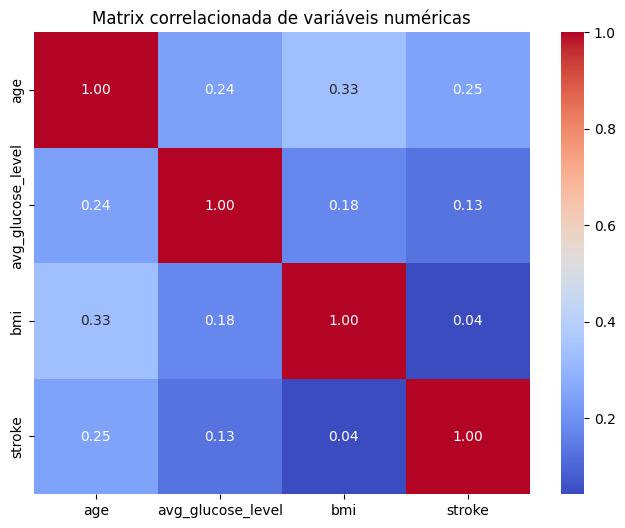

In [12]:
if 'stroke' not in lista_numericas:
    lista_numericas.append('stroke')
df_numerica = df[lista_numericas]

matrix_corr = df_numerica.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix correlacionada de variáveis numéricas')
plt.show()

###### 2.2.2) Calcule a correlação entre as variáveis numéricas de entrada com a variável de saída (stroke) e plote em um gráfico de barra os valores obtidos.

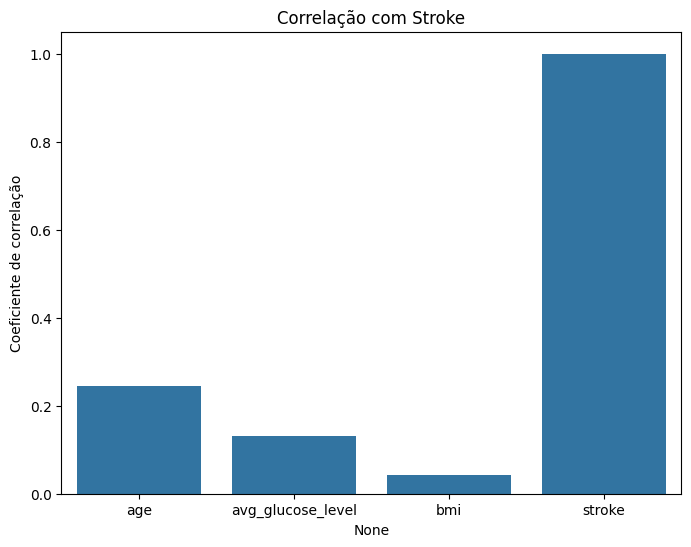

In [13]:
stroke_corr = df_numerica.corr()['stroke']

plt.figure(figsize=(8, 6))
sns.barplot(x= stroke_corr.index, y= stroke_corr.values)
plt.title('Correlação com Stroke')
plt.ylabel('Coeficiente de correlação')
plt.show()

##### 2.3) Realize uma inspeção de dados faltantes utilizando o df.isna().sum() (se usar apenas o df.isna(), será retornado um DataFrame com True nos valores faltantes e False nos não faltantes, o '.sum()' realiza a soma de ocorrências de True para cada coluna.)

In [14]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


###### 2.3.1) Realize a inserção de valores faltantes com média ou mediana nas variáveis numéricas.

In [15]:
for col in lista_numericas:
  valor_preenchimento = df[col].median()

  if df[col].isnull().any():
      df[col] = df[col].fillna(valor_preenchimento)

      print(f"-> Coluna '{col}': Valores nulos preenchidos com a mediana ({valor_preenchimento:.2f})")

# Verificação final para confirmar que funcionou
print("\nVerificação de nulos APÓS o preenchimento:")
print(df[lista_numericas].isnull().sum())

-> Coluna 'bmi': Valores nulos preenchidos com a mediana (28.10)

Verificação de nulos APÓS o preenchimento:
age                  0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


##### 2.4) Análise dos outliers

###### 2.4.1) Crie um boxplot para cada uma das variáveis numéricas

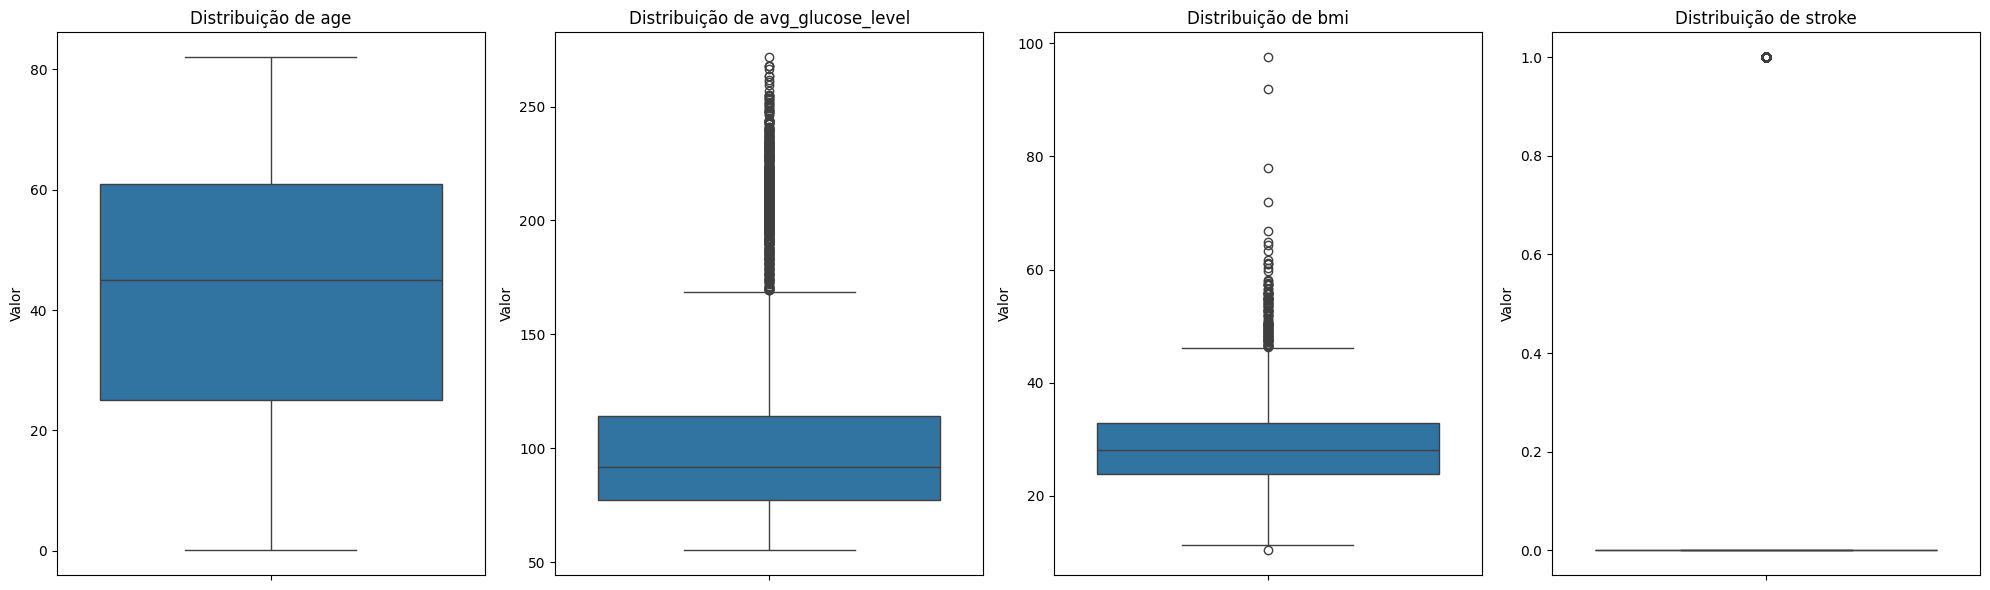

In [16]:
if len(lista_numericas) > 0:
    fig, axs = plt.subplots(nrows=1, ncols=len(lista_numericas), figsize=(5 * len(lista_numericas), 6))
    axs = np.ravel(axs)

    for i, col in enumerate(lista_numericas):
        sns.boxplot(y=df[col], ax=axs[i])
        axs[i].set_title(f'Distribuição de {col}')
        axs[i].set_ylabel('Valor')
        axs[i].set_xlabel('')

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma variável numérica para plotar.")

###### 2.4.2) Remova os outliers fazendo uso do intervalo interquartil ($IQR = Q3 - Q1$), os dados que estão 1,5 vezes o IQR abaixo de Q1 ou acima de Q3. Fale quantas linhas o dataset tinha antes da remoção e após (dica: use o len(df)).

In [17]:
linhas_antes = len(df)
print(f"Número de linhas antes da remoção dos outliers: {linhas_antes}")

for col in lista_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    abaixo_Q1 = Q1 - 1.5 * IQR
    acima_Q3 = Q3 + 1.5 * IQR
    df = df[(df[col] >= abaixo_Q1) & (df[col] <= acima_Q3)]

linhas_depois = len(df)
print(f"Número de linhas depois da remoção dos outliers: {linhas_depois}")

Número de linhas antes da remoção dos outliers: 5110
Número de linhas depois da remoção dos outliers: 4219


##### 2.4) Análise das categorias presentes nas variáveis categóricas (já discretizadas e as não discretizadas).

In [18]:
for col in lista_categóricas_discretizadas:
    print(f"\n--- {col} ---")
    print("Categorias únicas:", df[col].nunique())
    print("Distribuição:")
    print(df[col].value_counts(normalize=True) * 100)


--- hypertension ---
Categorias únicas: 2
Distribuição:
hypertension
0    93.150036
1     6.849964
Name: proportion, dtype: float64

--- heart_disease ---
Categorias únicas: 2
Distribuição:
heart_disease
0    96.420953
1     3.579047
Name: proportion, dtype: float64


In [19]:
for col in lista_categóricas_a_ser_discretizadas:
    print(f"\n--- {col} ---")
    print("Categorias únicas:", df[col].nunique())
    print("Distribuição:")
    print(df[col].value_counts(normalize=True) * 100)


--- gender ---
Categorias únicas: 3
Distribuição:
gender
Female    58.947618
Male      41.028680
Other      0.023702
Name: proportion, dtype: float64

--- ever_married ---
Categorias únicas: 2
Distribuição:
ever_married
Yes    61.388955
No     38.611045
Name: proportion, dtype: float64

--- work_type ---
Categorias únicas: 5
Distribuição:
work_type
Private          56.482579
children         15.951647
Self-employed    14.482105
Govt_job         12.562219
Never_worked      0.521451
Name: proportion, dtype: float64

--- Residence_type ---
Categorias únicas: 2
Distribuição:
Residence_type
Urban    50.675516
Rural    49.324484
Name: proportion, dtype: float64

--- smoking_status ---
Categorias únicas: 4
Distribuição:
smoking_status
never smoked       36.359327
Unknown            32.803982
formerly smoked    15.643517
smokes             15.193174
Name: proportion, dtype: float64


###### 2.4.1) Discretize as variáveis categóricas utilizando o OneHotEncoder. Utilize o parâmetro 'min_frequency = 0.1' para eliminar os dados menos frequentes, 'sparse_output=False' e 'drop = 'first''.

In [20]:
encoder = OneHotEncoder(min_frequency=0.1, sparse_output=False, drop='first')

df_encoded = encoder.fit_transform(df[lista_categóricas_a_ser_discretizadas])

df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(lista_categóricas_a_ser_discretizadas), index=df.index)

df = pd.concat([df.drop(lista_categóricas_a_ser_discretizadas, axis=1), df_encoded], axis=1)

display(df.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
30669,3.0,0,0,95.12,18.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30468,58.0,1,0,87.96,39.2,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16523,8.0,0,0,110.89,17.6,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56543,70.0,0,0,69.04,35.9,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46136,14.0,0,0,161.28,19.1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


###### 2.4.2) Remover as colunas com o nome 'infrequent' (basta rodar o código dado abaixo).

In [21]:
new_columns = [col for col in df.columns if 'infrequent' not in df.columns] #caso seu DataFrame se chame 'df', mudar de acordo.
df = df[new_columns]
display(df.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_infrequent_sklearn,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,work_type_infrequent_sklearn,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
30669,3.0,0,0,95.12,18.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30468,58.0,1,0,87.96,39.2,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16523,8.0,0,0,110.89,17.6,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56543,70.0,0,0,69.04,35.9,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46136,14.0,0,0,161.28,19.1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0



2.5) Particione o dataset em treino e teste (80% e 20%, respectivamente), utilizando a seed 5521 (parâmetro 'random_state'). Use o train_test_split do sklearn.

In [22]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5521)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3375, 16)
Shape of X_test: (844, 16)
Shape of y_train: (3375,)
Shape of y_test: (844,)


##### 2.6) Aplique a padronização dos dados (no conjunto de teste e treino) numéricos utilizando o MinMaxScaler ou StandartScaler. Lembre-se, utilizamos os valores de máximo e mínimo (alternativamente a média e o desvio padrão) do conjunto de treino!!!

In [24]:
scaler = MinMaxScaler()

if 'stroke' in lista_numericas:
    lista_numericas.remove('stroke')

X_train[lista_numericas] = scaler.fit_transform(X_train[lista_numericas])
X_test[lista_numericas] = scaler.transform(X_test[lista_numericas])

print("Numerical features in X_train after scaling:")
display(X_train[lista_numericas].head())
print("\nNumerical features in X_test after scaling:")
display(X_test[lista_numericas].head())

Numerical features in X_train after scaling:


,age,avg_glucose_level,bmi
id,,,
16513,0.951172,0.433192,0.538012
46079,0.377441,0.207827,0.508772
42594,0.975586,0.518861,0.549708
57645,0.914551,0.680769,0.435673
7250,0.621582,0.286885,0.897661



Numerical features in X_test after scaling:


,age,avg_glucose_level,bmi
id,,,
66306,0.523926,0.241054,0.520468
61017,0.145508,0.626653,0.301170
28500,0.121094,0.323991,0.149123
21973,0.853516,0.095540,0.549708
22536,0.145508,0.262824,0.543860


#### 3)KNN (k = 5 e distância euclidiana)

Nesta sessão, você implementará o modelo KNN para realizar a classificação com base nos dados pré-processados. Utilize o KNeighborsClassifier do sklearn.

##### 3.1) Treine utilizando o conjunto de Treino

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


##### 3.2) Faça predições para o conjunto de teste

In [26]:
y_pred = knn.predict(X_test)
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

##### 3.3) Faça uma Inferência no seu modelo

Agora, com um dado fictício, teste se seu modelo conseguirá predizer corretamente se esse dado representa um caso de obesidade ou não.

Dicas:

Crie uma array para o dado fictício
Ao criar o dado fictício (por exemplo Age: 39) lembre-se que o modelo que treinou está com os dados normalizados então normalize o dado fictício antes de inferí-lo no modelo
Consulte (use X_train.columns) o nome das colunas após a discretização e remoção das colunas referente às categorias pouco frequentes para não se confundir.

In [28]:
fictional_data = {
    'age': [50],
    'hypertension': [0],
    'heart_disease': [0],
    'avg_glucose_level': [100],
    'bmi': [25],
    'gender_Male': [1],
    'gender_infrequent_sklearn': [0],
    'ever_married_Yes': [1],
    'work_type_Private': [1],
    'work_type_Self-employed': [0],
    'work_type_children': [0],
    'work_type_infrequent_sklearn': [0],
    'Residence_type_Urban': [1],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [1],
    'smoking_status_smokes': [0]
}

fictional_df = pd.DataFrame(fictional_data)

fictional_df = fictional_df[X_train.columns]

fictional_df[lista_numericas] = scaler.transform(fictional_df[lista_numericas])

prediction = knn.predict(fictional_df)

print(f"The predicted stroke risk for the fictional data is: {prediction[0]}")

The predicted stroke risk for the fictional data is: 0
